### Customer Lifetime Value - CLV

https://campus.datacamp.com/courses/machine-learning-for-marketing-in-python/customer-lifetime-value-clv-prediction?ex=1 <br> https://s3.amazonaws.com/assets.datacamp.com/production/course_19815/slides/chapter3.pdf

What is CLV?

- how much a company expects to learn from a customer in lifetime
- historical to get the actual customer value or predicted to predict it

retention rate/churn rate gives us a proxy of the expected length of a customer lifetime with the company
cohort table derived from the insureds data. created by assigning each insured to an annual cohort based on the year they've made business with B for the first time. 
pivot table with actibvity counts of each cohort within subsequent years
cohort table - annual cohorts - in each row the same group of customers who started a policy on year 1 and then some of them came back on subsequent years

#### Group customers into cohorts based on the month they have made their first purchase. Then assign cohort index based to each purchase of the customer. It will represent the number of months since the first transaction.  

In [6]:
# data from an online uk retail store
data = pd.read_csv('online.csv')
data[:2]

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom


In [18]:
import datetime as dt
# truncates a given data object to a 1st day of the month
def get_month(date_time_str):
    # convert a str to a datetime
    x = dt.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
    return dt.datetime(x.year, x.month, 1)

data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)
data[:1]

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.1,14286,United Kingdom,2011-10-01


In [24]:
grouping = data.groupby('CustomerID')['InvoiceMonth']
# assign the smallest InvoiceMonth value to each customer - this is the first transalction made by a customer
data['CohortMonth'] = grouping.transform('min')
data[:2]

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01


In [26]:
# extract year month and date as int values
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# number of months between any transaction and the first transaction for each customer
invoice_year, invoice_month, _ = get_date_int(data, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(data, 'CohortMonth')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

# convert total difference to months
data['CohortIndex'] = years_diff*12 + months_diff + 1 # +1 so that the 1st month is marked as month rather than 0

data[:2]

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3


In [57]:
# count monthly active customers from each cohort
grouping = data.groupby(['CohortMonth','CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data[:1]

CohortMonth  CohortIndex
2010-12-01   1              716
Name: CustomerID, dtype: int64

In [58]:
# pandas pivot
cohort_data = cohort_data.reset_index()
cohort_data['CohortMonth'] = cohort_data['CohortMonth'].apply(lambda x: x.strftime('%Y-%m'))
cohort_counts = cohort_data.pivot(index = 'CohortMonth', columns = 'CohortIndex', values = 'CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Calculate retention rate**

In [88]:
# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.div(cohort_sizes, axis=0)

# NaNs - the more recent cohorts had less time to be active
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.343575,0.308659,0.350559,0.342179,0.398045,0.347765,0.329609,0.335196,0.370112,0.354749,0.486034,0.240223
2011-01,1.0,0.207831,0.246988,0.243976,0.331325,0.271084,0.246988,0.259036,0.313253,0.307229,0.373494,0.135542,NaN
2011-02,1.0,0.183544,0.180380,0.262658,0.268987,0.234177,0.253165,0.262658,0.272152,0.300633,0.088608,NaN,NaN
2011-03,1.0,0.162371,0.257732,0.195876,0.213918,0.172680,0.252577,0.219072,0.275773,0.097938,NaN,NaN,NaN
2011-04,1.0,0.192157,0.203922,0.192157,0.184314,0.203922,0.219608,0.231373,0.066667,NaN,NaN,NaN,NaN
2011-05,1.0,0.160643,0.172691,0.144578,0.208835,0.232932,0.244980,0.088353,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.159420,0.125604,0.198068,0.236715,0.299517,0.091787,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.161850,0.179191,0.219653,0.254335,0.098266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.215827,0.201439,0.251799,0.100719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Visualising retention rate**

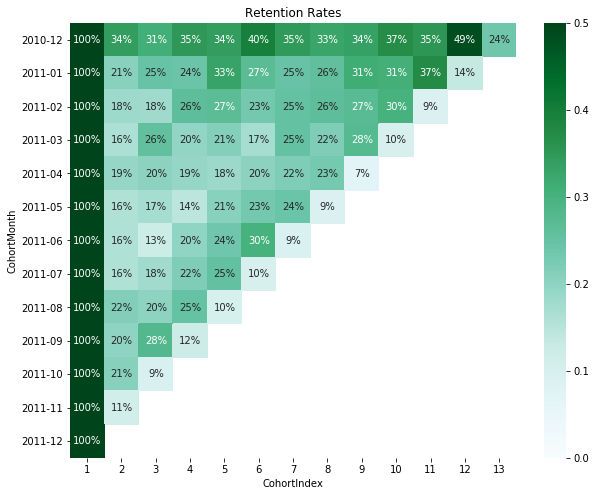

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title('Retention Rates')

sns.heatmap(data = retention,
           annot = True,
           fmt = '.0%',
           vmin=0.0,
           vmax=0.5,
           cmap='BuGn')

In [89]:
# Calculate churn
churn = 1 - retention
churn

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,0.0,0.656425,0.691341,0.649441,0.657821,0.601955,0.652235,0.670391,0.664804,0.629888,0.645251,0.513966,0.759777
2011-01,0.0,0.792169,0.753012,0.756024,0.668675,0.728916,0.753012,0.740964,0.686747,0.692771,0.626506,0.864458,NaN
2011-02,0.0,0.816456,0.819620,0.737342,0.731013,0.765823,0.746835,0.737342,0.727848,0.699367,0.911392,NaN,NaN
2011-03,0.0,0.837629,0.742268,0.804124,0.786082,0.827320,0.747423,0.780928,0.724227,0.902062,NaN,NaN,NaN
2011-04,0.0,0.807843,0.796078,0.807843,0.815686,0.796078,0.780392,0.768627,0.933333,NaN,NaN,NaN,NaN
2011-05,0.0,0.839357,0.827309,0.855422,0.791165,0.767068,0.755020,0.911647,NaN,NaN,NaN,NaN,NaN
2011-06,0.0,0.840580,0.874396,0.801932,0.763285,0.700483,0.908213,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,0.0,0.838150,0.820809,0.780347,0.745665,0.901734,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,0.0,0.784173,0.798561,0.748201,0.899281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# Calculate the mean retention rate
retention_rate = retention.iloc[:,1:].mean().mean()

# Calculate the mean churn rate
churn_rate = churn.iloc[:,1:].mean().mean()

# Print rounded retention and churn rates
print('Retention rate: {:.2f}; Churn rate: {:.2f}'.format(retention_rate, churn_rate))

Retention rate: 0.24; Churn rate: 0.76


**Calculate Customer Lifetime Value**

##### 1. Revenue based CLV
CLV = AVG Revenue * (Retention/Churn)

In [79]:
# monthly revenue by customer
data['TotalSum'] = data['Quantity']*data['UnitPrice']

# overal avg revenue
monthly_revenue = data.groupby(['InvoiceMonth','CustomerID'])['TotalSum'].sum().mean()

# define lifespan , usually depends on many other things, let's assume it is 36 months
# can be inferred from the avg time it takes customers to churn from the time they made their first purchase
lifespan_months = 36

# calculate basic clv
clv_basic = monthly_revenue * lifespan_months
print('Average basic CLV is {:.1f}'.format(clv_basic))

Average basic CLV is 4774.6


##### 2. Granular CLV

In [81]:
# calculate average revenue per purchase 
# one invoice many datapoints
revenue_per_purchase = data.groupby(['InvoiceNo'])['TotalSum'].mean().mean()

# the overall average revenue per purchase
revenue_per_purchase

34.806123301023845

In [85]:
# calculate average number of invoices per customer per month
frq = data.groupby(['CustomerID','InvoiceMonth'])['InvoiceNo'].nunique().mean()

# define lidespan
lifespan_months = 36

clv_granular = revenue_per_purchase * frq * lifespan_months
print('Average granular CLV is {:.1f}'.format(clv_granular))

Average granular CLV is 1635.2


3. Traditional CLV
- no lifetime required

In [91]:
clv_traditional = monthly_revenue * (retention_rate/churn_rate)
print("Average traditional CLV is {:.1f} at {:.1f} % retention rate".format(clv_traditional, retention_rate))

Average traditional CLV is 42.4 at 0.2 % retention rate


**Which method to use**

- depends on the business model
- Traditional CLV model - assumes churn is definitive = customer 'dies' or the customer is not expected to come back if he's churned once
- Traditional model is not robust at low retention rates - values will under report the CLV
- Hardest thing to predict - frequency of purchases in the future

**To do:**
- predict frq if you want to use granular clv

**Calculate AV price**

In [40]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = data.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_av_price = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_av_price = cohort_av_price.reset_index()

# Create a pivot 
average_price = cohort_av_price.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
print(average_price.round(1))

CohortIndex   1    2    3    4    5    6    7    8    9    10   11   12   13
CohortMonth                                                                 
2010-12-01   3.0  3.0  3.0  2.8  2.7  6.9  2.8  3.0  2.7  2.7  3.0  2.8  2.6
2011-01-01   3.2  3.1  3.0  3.0  3.1  3.0  3.0  2.5  2.7  2.9  2.6  2.0  NaN
2011-02-01   3.1  4.0  3.3  2.9  3.3  2.9  2.8  2.7  2.9  2.7  3.1  NaN  NaN
2011-03-01   3.5  3.6  3.5  2.8  2.7  2.5  2.7  2.9  2.5  2.4  NaN  NaN  NaN
2011-04-01   3.3  4.4  3.4  2.6  2.8  2.8  2.8  2.6  2.6  NaN  NaN  NaN  NaN
2011-05-01   3.1  2.8  2.5  2.7  2.5  2.3  2.7  2.3  NaN  NaN  NaN  NaN  NaN
2011-06-01   2.8  2.4  2.7  3.1  2.5  2.4  2.5  NaN  NaN  NaN  NaN  NaN  NaN
2011-07-01   3.2  3.1  3.4  2.5  2.4  2.3  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-08-01   2.9  3.7  5.4  6.9  4.2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-09-01   2.9  3.1  3.0  2.6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-10-01   2.9  2.7  2.5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN